# Introduction to Data Science: a python approach to concepts techniques and applications
-Laura Igual & Santi Sequi

Working through this book and implementing the examples in p3

## Introduction to Data Science

**Datafication** the process of rendering into data aspects of the world that have never been quantified before.

**Democratization of Data Analysis** the recent availability of open analytic tools makes it possible for anyone to use rich data to take evidence-based decisions.

**Data Science** a methodology by which actionable insights can be inferred from data. ...The production of beliefs informaed by data and to be used as the basis of decision making. Data Science allows four different strategies to explore the world using data:

1. *Probing reality* the responce of the world to our actions. e.g. A/B testing for web development.
2. *Pattern discovery* discover useful patterns and natural clusters to simplify solutions.
3. *Predicting future events* allow decisions to be taken in response to future events, not only reactively.
4. *Understanding people and the world* natural language, computer vision, psychology and neuroscience.

**This book** demystify data science by describing a set of tools and techniques thatallows a person with basic skills in computer science, mathematics and statistics to perform the tasks commonly associated with data science.



## Toolboxes for Data Scienctists

**Fundamental Python Libraries**
1. *Numpy* support for multidimentional arrays
2. *SciPy* collections of algorithms and toolboxes for stats, signal processing, optimization etc.
3. *SCIKIT-Learn* machine learning library for classification, regression, model selection etc.
4. *PANDAS* dataframes & data analysis tools.
5. *Matplotlib* pretty pictures.


In [1]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#pandas data.frames
#basically just like R data.frmaes. tabular structures with rows and columns
data = { 'year': [
    2010, 2011, 2012,
    2010, 2011, 2012,
    2010, 2011, 2012 ], 
       'team': [
           'FCBarcelona', 'FCBarcelona', 'FCBarcelona',
           'RMadrid', 'RMadrid', 'RMadrid',
           'VallenciaCF', 'VallenciaCF', 'ValenciaCF'],
       'wins': [30, 28, 32, 29, 32, 26, 21, 17, 19],
       'draws': [6, 7, 4, 5, 4, 7, 8, 19, 8],
       'losses': [2, 3, 2, 4, 2, 5, 9, 11, 11]}
football = pd.DataFrame( data, columns = [
    'year', 'team', 'wins', 'draws', 'losses'])
football

,year,team,wins,draws,losses
0,2010,FCBarcelona,30,6,2
1,2011,FCBarcelona,28,7,3
2,2012,FCBarcelona,32,4,2
3,2010,RMadrid,29,5,4
4,2011,RMadrid,32,4,2
5,2012,RMadrid,26,7,5
6,2010,VallenciaCF,21,8,9
7,2011,VallenciaCF,17,19,11
8,2012,ValenciaCF,19,8,11


In [55]:
#importing data from a .csv to a pandas dataframe
edu_url = 'https://raw.githubusercontent.com/DataScienceUB/introduction-datascience-python-book/master/files/ch02/educ_figdp_1_Data.csv'
edu_df = pd.read_csv( edu_url, 
                    na_values = ':',
                    usecols = ['TIME', 'GEO', 'Value'])

read_csv is much R method to do the same. other methods to import data: `read_excel()`, `read_table()`, `read_hdf()` and even a method to read from clipboard: `read_clipboard()`

In [9]:
edu_df.head( 5 )

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [10]:
edu_df.tail( 4 )

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


In [11]:
#describe() works much like summary() in R:
edu_df.describe()

,TIME,Value
count,384.000000,361.000000
mean,2005.500000,5.203989
std,3.456556,1.021694
min,2000.000000,2.880000
25%,2002.750000,4.620000
50%,2005.500000,5.060000
75%,2008.250000,5.660000
max,2011.000000,8.810000


In [24]:
#selecting data
edu_df.loc[ 13:15, [ 'TIME', 'Value' ] ]
#iloc is really handy too

,TIME,Value
13,2001,4.99
14,2002,5.00
15,2003,5.04


In [28]:
#filtering data
len( edu_df[ edu_df[ 'Value' ] > 6.5 ] )

33

**The only safe way to tell if a value is missing in a DataFrame is by using the isnull() function**

In [29]:
len( edu_df[ edu_df[ "Value" ].isnull() ] )

23

Common Aggregation Functions: `count()`, `sum()`, `mean()`, `median()`, `min()`, `max()`, `prod()`, `std()`, `var()`

In [32]:
print( 'Pandas max fxn:', edu_df[ 'Value'].max() )
print( 'Python max fxn:', max( edu_df[ 'Value' ] ) )

Pandas max fxn: 8.81
Python max fxn: nan


In [33]:
#Applying Operations to values in rows/columns or rows&columns:
s = edu_df[ "Value" ]/100
s.head()

s = edu_df[ "Value" ].apply( np.sqrt )
s.head()

#in line functions
s = edu_df[ "Value" ].apply( lambda d: d**2 )
s.head()

0        NaN
1        NaN
2    25.0000
3    25.3009
4    24.5025
Name: Value, dtype: float64

In [46]:
#New Feature based on Old
edu_df[ "ValueNorm" ]= edu_df[ "Value" ]/edu_df[ "Value" ].max()
edu_df.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


In [48]:
#removing features with drop()
edu_df.drop( [ 'ValueNorm' ], axis=1, inplace=True)
edu_df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [57]:
#appending a row
edu_df_new = pd.DataFrame( { "TIME" : [ 2000 ] , "Value" : [ 5.00 ] , "GEO" : [ 'a' ] } )
edu_df = edu_df.append( edu_df_new, ignore_index =  True ) 
edu_df.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,a,5.00


In [59]:
#remove the row
edu_df.drop( max( edu_df.index ), axis = 0, inplace = True )
edu_df.tail()

,TIME,GEO,Value
378,2006,Finland,6.18
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85


In [63]:
#filtering NaN values
edu_dropNaN = edu_df.dropna( subset = [ "Value" ] )
edu_dropNaN.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


In [64]:
#sorting
edu_df.sort_values( by = 'Value', ascending = False, inplace = True )
edu_df.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [65]:
#group by
group = edu_df[ [ "GEO", "Value" ] ].groupby( "GEO" ).mean( )
group.head( )

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [76]:
#pivotting data
filtered_edu = edu_df[ edu_df[ "TIME" ] > 2005 ]
pivedu = pd.pivot_table( filtered_edu, values = "Value",
                       index = [ "GEO" ],
                       columns = [ "TIME" ] )
pivedu.head( )

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [77]:
#ranking data
pivedu = pivedu.drop( [ "Euro area (13 countries)",
                       "Euro area (15 countries)",
                       "Euro area (17 countries)",
                       "Euro area (18 countries)",
                       "European Union (25 countries)",
                       "European Union (27 countries)",
                       "European Union (28 countries)" ], axis = 0)
pivedu = pivedu.rename( index = { "Germany (until 1990 former territory of the FRG)" : "Germany" })
pivedu = pivedu.dropna()
pivedu.rank( ascending = False, method = "first").head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,9.0,6.0,10.0,6.0,7.0,7.0
Belgium,4.0,4.0,3.0,3.0,4.0,4.0
Bulgaria,20.0,20.0,19.0,19.0,21.0,21.0
Cyprus,2.0,2.0,2.0,2.0,2.0,3.0
Czech Republic,18.0,19.0,20.0,20.0,19.0,18.0


In [82]:
totalSum = pivedu.sum( axis = 1 )
totalSum.rank( ascending = False, method = "dense" ).sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Malta      3.0
Belgium    4.0
Ireland    5.0
dtype: float64

Some basic plots.....

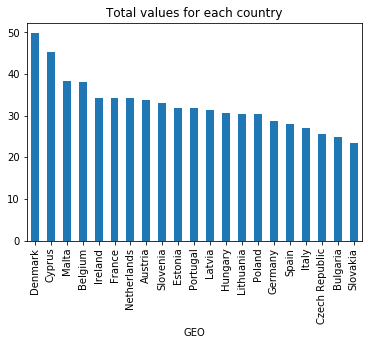

In [87]:
totalSum = pivedu.sum( axis = 1 ).sort_values( ascending = False )
totalSum.plot( kind = 'bar', style = 'b', title = "Total values for each country")

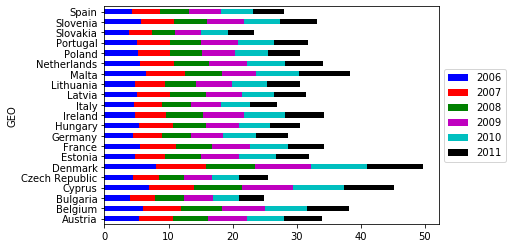

In [89]:
my_colors = [ "b", "r", "g", "m","c", "k" ]
ax = pivedu.plot( kind = "barh", stacked = True, color = my_colors )
ax.legend( loc = "center left", bbox_to_anchor = (1, 0.5))

## Descriptive Statistics

### linkyLinkLinks
https://github.com/DataScienceUB/introduction-datascience-python-book